In [2]:
# # Exploring the Bias-Variance Tradeoff
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
### Brain and body weight
# This is a [dataset]) of the average weight of the body and the brain for 62 mammal species. 
# Let's read it into pandas and take a quick look:

df = pd.read_table('http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt', sep='\s+', skiprows=33,
names=['id','brain','body'], index_col='id')
df.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [4]:
# We're going to focus on a smaller subset in which the body weight is less than 200:
df = df[df.body < 200]
df.shape

(51, 2)

(-10, 250)

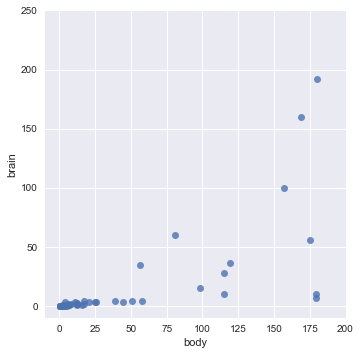

In [5]:
# Let's create a scatterplot
sns.lmplot(x='body', y='brain', data=df, ci=None, fit_reg=False)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

(-10, 250)

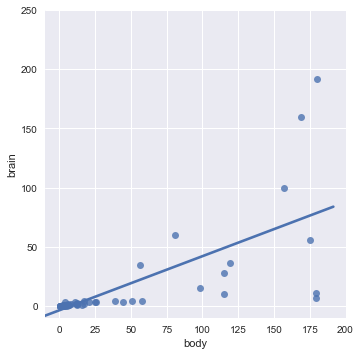

In [6]:
sns.lmplot(x='body', y='brain', data=df, ci=None)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

In [7]:
# set a random seed for reproducibility
np.random.seed(12345)
# randomly assign every row to either sample 1 or sample 2
df['sample'] = np.random.randint(1, 3, len(df))
df.head()

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


In [8]:
# Compare the two samples, they are fairly different!
df.groupby('sample')[['brain', 'body']].mean()

,brain,body
sample,,
1,18.113778,52.068889
2,13.323364,34.669091


(-10, 250)

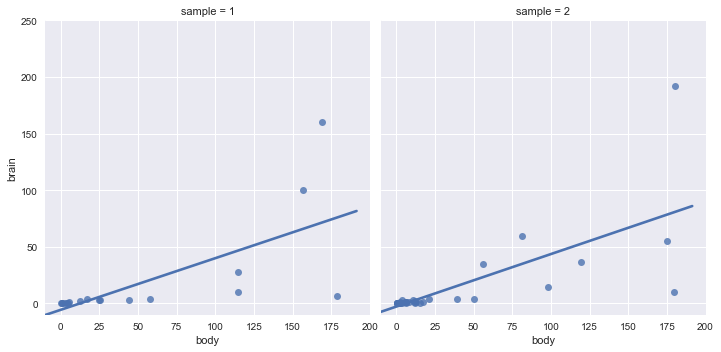

In [9]:
# col='sample' subsets the data by sample and creates two separate plots
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample')
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

In [10]:
# hue='sample' subsets the data by sample and creates a single plot

(-10, 250)

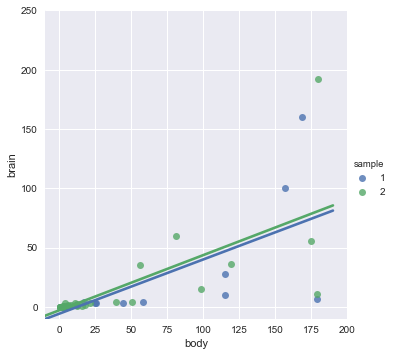

In [11]:
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample')
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

(-10, 250)

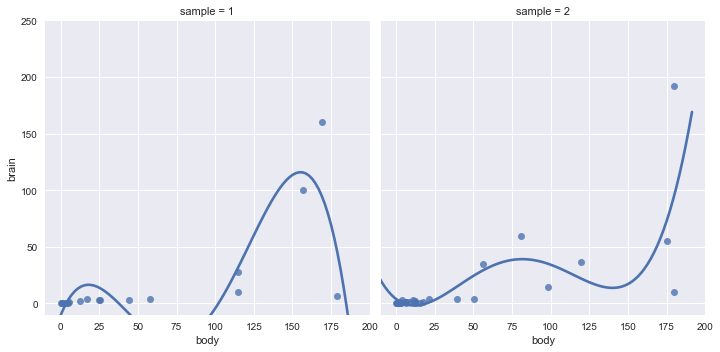

In [12]:
# What would a low bias, high variance model look like? Let's try polynomial regression,
# with an fourth order polynomial:
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', order=4)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

(-10, 250)

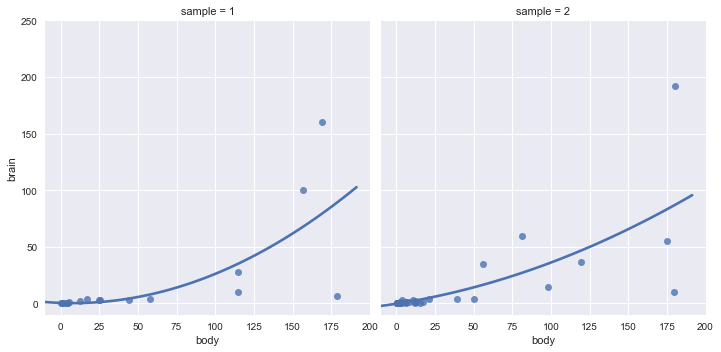

In [13]:
# Let's try a second order polynomial instead:
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', order=2)
sns.plt.xlim(-10, 200)
sns.plt.ylim(-10, 250)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# read in the iris data

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
knn.score(X, y)

1.0

C:\Users\admin\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


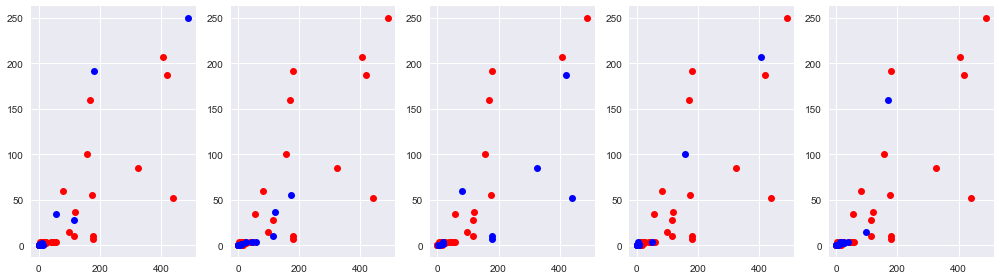

In [16]:
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
df = pd.read_table('http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt', sep='\s+', skiprows=33,names=['id','brain','body'])
df = df[df.brain < 300][df.body < 500]

# limit points for visibility
nfolds = 5
fig, axes = plt.subplots(1, nfolds, figsize=(14,4))
for i, fold in enumerate(KFold(len(df), n_folds=nfolds, shuffle=True)):
    training, validation = fold
    x, y = df.iloc[training]['body'], df.iloc[training]['brain']
    axes[i].plot(x, y, 'ro')
    x, y = df.iloc[validation]['body'], df.iloc[validation]['brain']
    axes[i].plot(x, y, 'bo')
plt.tight_layout()

In [17]:
# Using a training set and test set is so important
# Just as important is cross validation. Remember cross validation
# is using several different train test splits and
# averaging your results!

## CROSS-VALIDATION
# check CV score for K=1
from sklearn.cross_validation import cross_val_score, train_test_split

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

print X.shape
print y.shape
tree = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
scores.mean()

(150L, 4L)
(150L,)


0.95999999999999996

In [18]:
# check CV score for K=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores
np.mean(scores)

0.97333333333333338

In [19]:
# search for an optimal value of K
k_range = range(1, 30, 2) # [1, 3, 5, 7, …, 27, 29]
errors = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # instantiate a KNN with k neighbors
    
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # get our five accuracy scores
    
    accuracy = np.mean(scores)
    # average them together
    
    error = 1 - accuracy
    # get our error, which is 1 minus the accuracy
    
    errors.append(error)
    # keep track of a list of errors

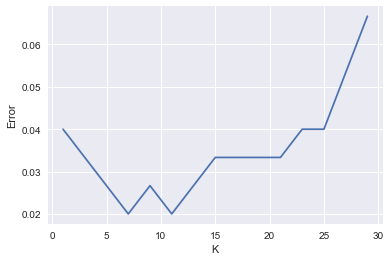

In [20]:
# plot the K values (x-axis) versus the 5-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, errors)
plt.xlabel('K')
plt.ylabel('Error')

In [21]:
from sklearn.grid_search import GridSearchCV
# import our grid search module

knn = KNeighborsClassifier()
# instantiate a blank slate KNN, no neighbors

k_range = range(1, 30, 2)
param_grid = dict(n_neighbors=k_range)
# param_grid = {"n_ neighbors": [1, 3, 5, …]}

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

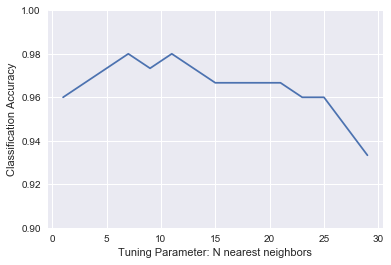

In [22]:
# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
# this is a list of the average accuracies for each parameter combination

plt.figure()
plt.ylim([0.9, 1])
plt.xlabel('Tuning Parameter: N nearest neighbors')
plt.ylabel('Classification Accuracy')
plt.plot(k_range, grid_mean_scores)

In [24]:
grid.best_params_
# {'n_neighbors': 7}

grid.best_score_
# 0.9799999999

grid.best_estimator_
# actually returns the unfit model with the best parameters
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=7, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [25]:
knn = KNeighborsClassifier()
k_range = range(1, 30)
algorithm_options = ['kd_tree', 'ball_tree', 'auto', 'brute']
p_range = range(1, 8)

weight_range = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_range,
algorithm=algorithm_options, p=p_range)

# trying many more options
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'p': [1, 2, 3, 4, 5, 6, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['kd_tree', 'ball_tree', 'auto', 'brute'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [26]:
grid.best_score_

0.9866666666666667

In [27]:
grid.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 6, 'p': 3, 'weights': 'uniform'}

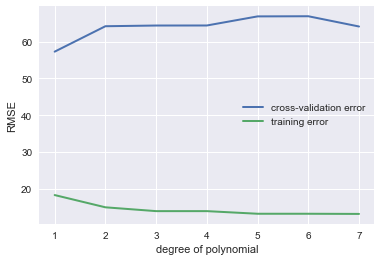

In [28]:
# This function uses a numpy polynomial fit function to
# calculate the RMSE of given X and y
def rmse(x, y, coefs):
    yfit = np.polyval(coefs, x)
    rmse = np.sqrt(np.mean((y - yfit) ** 2))
    return rmse

xtrain, xtest, ytrain, ytest = train_test_split(df['body'],df['brain'])

train_err = []
validation_err = []
degrees = range(1, 8)

for i, d in enumerate(degrees):
    p = np.polyfit(xtrain, ytrain, d)
    # built in numpy polynomial fit function
    
    train_err.append(rmse(xtrain, ytrain, p))
    validation_err.append(rmse(xtest, ytest, p))

fig, ax = plt.subplots()
# begin to make our graph

ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error')
ax.plot(degrees, train_err, lw=2, label = 'training error')

# Our two curves, one for training error, the other for cross validation

ax.legend(loc=0)
ax.set_xlabel('degree of polynomial')
ax.set_ylabel('RMSE')

In [30]:
# ENSEMBLING
import numpy as np
# set a seed for reproducibility
np.random.seed(12345)
# generate 1000 random numbers (between 0 and 1) for each model,
# representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

In [32]:
# each model independently predicts 1 (the "correct response") if
# random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)

In [33]:
preds5 = np.where(mod5 > 0.3, 1, 0)
print preds1.mean()
print preds2.mean()
print preds3.mean()
print preds4.mean()
print preds5.mean()
# Each model has an "accuracy of around 70% on its own

0.699
0.698
0.71
0.699
0.685


In [34]:
# average the predictions and then round to 0 or 1
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

ensemble_preds.mean()

0.82999999999999996